# INFO 371 Lab 6: Trees

#### Instructions

Please submit your completed lab notebook by the deadline. Working together is fun and useful but you must submit your own work. Discussing the solutions and problems with your instructors and classmates is completely fine. However, **do not** copy and paste their solution(s). Remember - your code/work should not appear (directly or indirectly) on any one else's machine and vice versa. 


#### Introduction
Your task is to set up a machine learning experiment using the [Ames Housing Prices dataset](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can find more on the dataset [here](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and the data is available [here](http://jse.amstat.org/v19n3/decock/AmesHousing.xls) (HINT: copy the link to the dataset and import directly into pandas as a .xls file).

In [2]:
import pandas as pd
import seaborn as sns

### Part 1: Data preparation

To start, let's prepare the data. This will have several steps.

#### 1. Load the data.

You can use your code from Lab 3 for this or download the data from the link above.

In [3]:
data = pd.read_excel('http://jse.amstat.org/v19n3/decock/AmesHousing.xls')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### 2. Filter data

Filter the data such that the `Sale Condition` variable is 'Normal' and then filter the data such that you only have the columns in the list below. These will be the input to your models and the `SalePrice` will be your output from the models. 

In [4]:
['Lot Area', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr', 'Full Bath', 'Half Bath']

['Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Bedroom AbvGr',
 'Full Bath',
 'Half Bath']

In [5]:
data_filtered = data[data['Sale Condition'] == 'Normal']
y = data_filtered['SalePrice']
X = data_filtered[['Lot Area', 'Overall Qual', 'Overall Cond', 'Bedroom AbvGr', 'Full Bath', 'Half Bath']]

### Part 2: Experiment preparation

Next, let's set up our ML experiment.

#### 1. Create train-test split.

Using your filtered data, create a 80-20 train-test split of your input (X) and output (y) data.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=11)
X_train.shape, X_test.shape

((1930, 6), (483, 6))

#### 2. Create a correlation heatmap

Use your X_train data to create a heatmap of correlations similar to [this](https://i.sstatic.net/p1OiD.png). Set the bounds on the correlation values to be between 0 and 1. Use whichever color scheme you desire as long as the sequencing makes sense for the data. What can you say about the correlations amongst variables in the dataset?

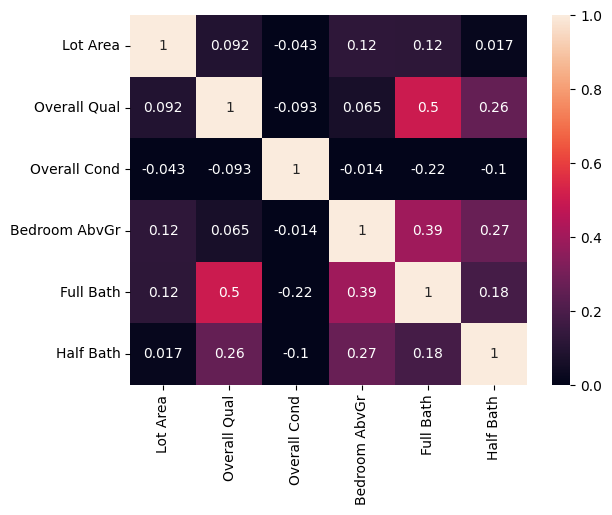

In [8]:
corr_map = X_train.corr()
_ = sns.heatmap(corr_map, vmin = 0, vmax=1, annot = True)

The correlations are less than or equal to 0.5. In particular, there are stronger positive correlations between full bath & overall quality and ufll bath & bedroom abvgr.

### Part 3: Create ML models

Now, let's create our predictive models.

#### 1. Create a decision tree model.

Create a decision tree model using the default parameters of the model. What is the RMSE of your predictor on the training data? On the test data?

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

In [10]:
model = DecisionTreeRegressor()

In [11]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
preds_train = model.predict(X_train)

In [13]:
rmse_train = root_mean_squared_error(y_train, preds_train)
rmse_train

3001.424201996138

In [14]:
preds_test = model.predict(X_test)

In [15]:
rmse_test = root_mean_squared_error(y_test, preds_test)
rmse_test

48726.51250350409

In [16]:
model.tree_.max_depth

26

The RMSE of our training data is about 3,000 and the RMSE of our test data is 48,852. Looking at the max depth of our tree, we can see it is 26 levels; thus, it is likely that our default model is overfitting our data.

#### 2. Optimize hyperparameters

Next, optimize two hyperparameters for the model - `max_depth` and `min_samples_split` - using a grid search cross-validation (i.e. the `GridSearchCV` method). What do these two hyperparameters represent?

In [17]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [18]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

In [26]:
grid_search = GridSearchCV(DecisionTreeRegressor(), 
                           param_grid={
                               'max_depth' : [2, 4, 6, 8, 10],
                               'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}, 
                           scoring=rmse_scorer, cv=5)

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_['max_depth']
best_samples_split = grid_search.best_params_['min_samples_split']
best_score = grid_search.best_score_ * -1

print("Depth:", best_depth)
print("Sample Splits:", best_samples_split)
print("RMSE:", best_score)

Depth: 6
Sample Splits: 4
RMSE: 36026.00620934078


Depth represents the max number of levels our tree will be and sample splits represents the minimum level of samples we need before we can split into child nodes. It prevents the tree from creating very small branches. In general, both of these hyperparameters help prevent overfitting as the model can become too precise if our depth is high and our min sample splits are too low.

#### 3. Re-train model

Using your best hyperparameters, re-fit the model. How does it perform on the training data? On the test data? How does this compare to your previous model?

In [20]:
model = DecisionTreeRegressor(max_depth = 6, min_samples_split = 3, random_state = 11)

In [21]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=11)

In [22]:
preds_train = model.predict(X_train)

In [23]:
rmse_train = root_mean_squared_error(y_train, preds_train)
rmse_train

28862.923167946057

In [24]:
preds_test = model.predict(X_test)

In [25]:
rmse_test = root_mean_squared_error(y_test, preds_test)
rmse_test

40665.087760849514

The RMSE for our training data is around 28,863 while our RMSE for the test data is around 40,665. While the training data performed worse than our unoptimized model, we have a lower RMSE for our testing data. However, the higher RMSE for our training data can be attributed to the fact that we have a lower depth, meaning that our model is likely not overfit anymore